In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

In [46]:
cols=['fLenght','fWidth','fSize','fConc','fConc1',' fAsym','fM3Long','fM3Trans',' fAlpha',' fDist','class']
df=pd.read_csv('magic04.data',names=cols)

In [47]:
df['class'].unique()

array(['g', 'h'], dtype=object)

In [48]:
df.head()

,fLenght,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


In [49]:
df['class']=(df['class']=='g').astype(int)

In [50]:
df.isnull().sum()

fLenght     0
fWidth      0
fSize       0
fConc       0
fConc1      0
 fAsym      0
fM3Long     0
fM3Trans    0
 fAlpha     0
 fDist      0
class       0
dtype: int64

In [51]:
df.head()

,fLenght,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,1
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,1
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,1
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,1
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,1


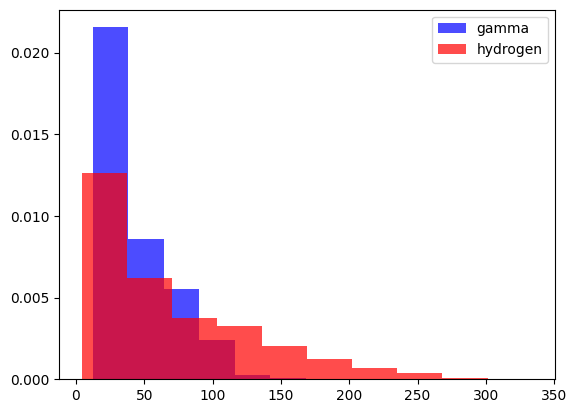

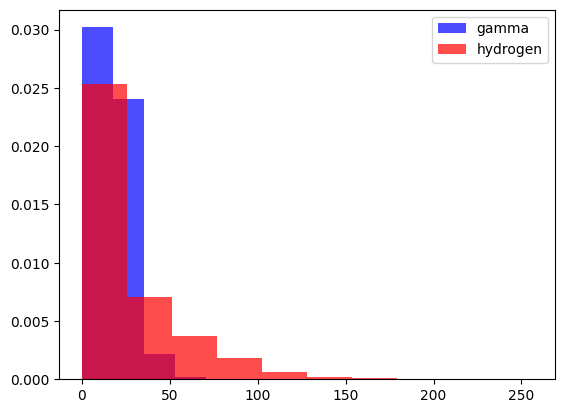

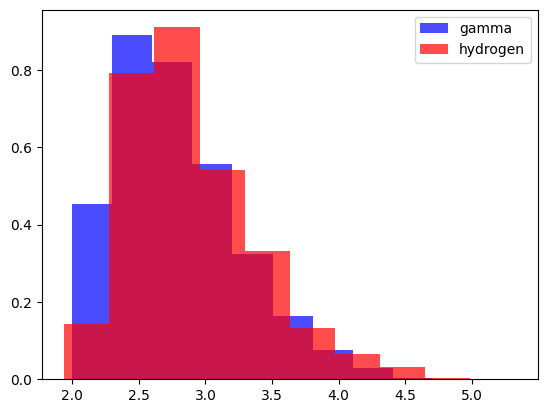

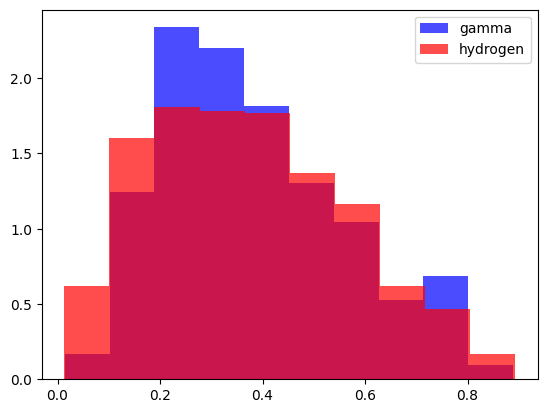

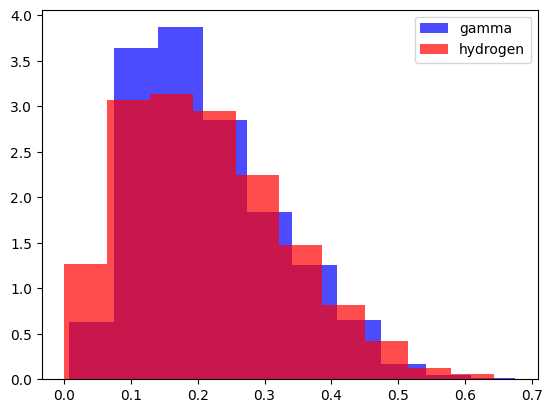

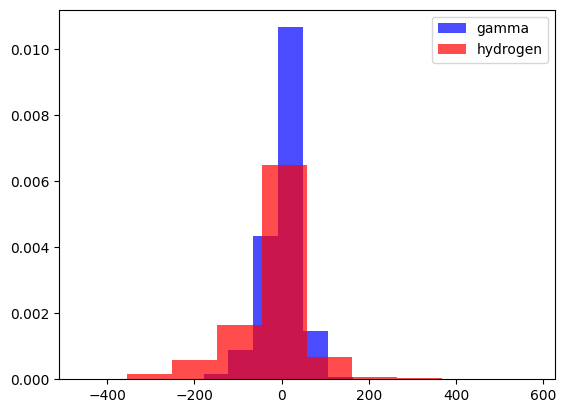

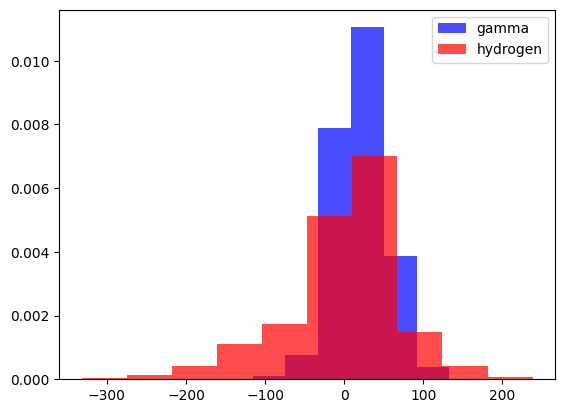

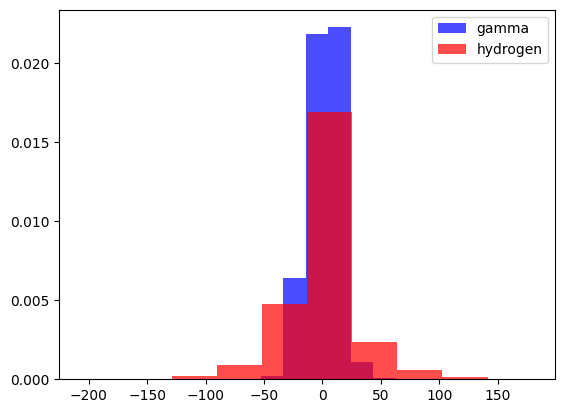

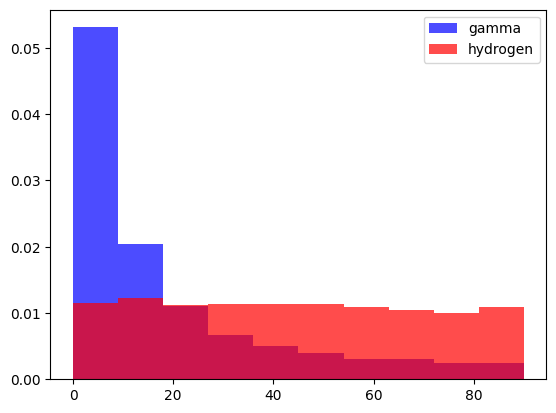

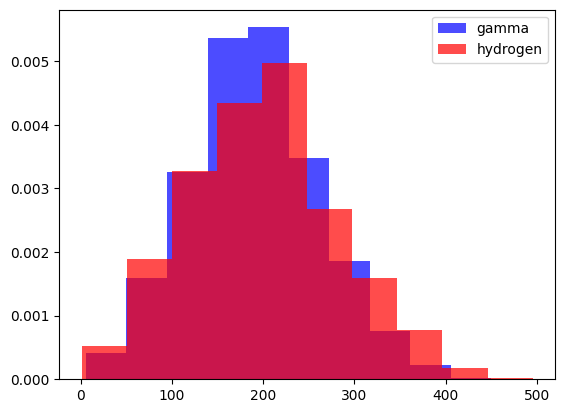

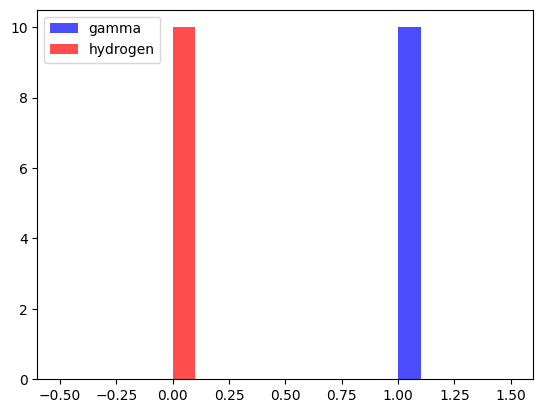

In [52]:
for label in df.columns:
 plt.hist(df[df['class']==1][label],color='blue',label='gamma',alpha=0.7,density=True)
 plt.hist(df[df['class']==0][label],color='red',label='hydrogen',alpha=0.7,density=True)
 plt.legend()
 plt.show()

Train  Tests vadilation  data sets


In [53]:
train,valid,test=np.split(df.sample(frac=1),[int(0.6*len(df)),int(0.8*len(df))])

In [54]:
def scale_dataset(dataframe, oversample=False):
  X = dataframe[dataframe.columns[:-1]].values
  y = dataframe[dataframe.columns[-1]].values

  scaler = StandardScaler()
  X = scaler.fit_transform(X)

  if oversample:
    ros = RandomOverSampler()
    X, y = ros.fit_resample(X, y)

  data = np.hstack((X, np.reshape(y, (-1, 1))))

  return data, X, y

In [55]:
train

,fLenght,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
16430,108.5198,44.4770,3.0955,0.2651,0.1570,126.5174,72.0308,16.2065,25.0553,262.2081,0
11334,41.8946,30.8500,3.5714,0.1629,0.0820,27.2532,31.8290,-17.8155,33.7570,109.6310,1
18845,56.7097,28.7761,3.2250,0.1719,0.0803,120.5699,-20.5209,2.5029,0.2003,204.8733,0
17155,19.5665,11.1070,2.5044,0.5329,0.2897,-19.6364,-7.6712,-8.9364,77.8131,159.6281,0
10899,26.5002,19.6695,2.7435,0.2888,0.1561,-15.0552,-10.9632,-3.9419,66.6800,54.2490,1
...,...,...,...,...,...,...,...,...,...,...,...
14406,204.3035,33.0586,2.9113,0.4168,0.2006,-276.8136,153.2959,17.7480,49.3124,134.7812,0
2285,24.8552,14.2801,2.5119,0.4554,0.2815,14.5513,16.8101,-11.6876,19.1574,196.3870,1
6328,66.8153,21.9456,3.1818,0.2020,0.1049,57.4815,65.0778,-14.1027,9.1974,179.2430,1
16659,93.0016,17.9410,3.0780,0.2804,0.1333,77.5630,91.8036,-14.7475,17.0072,327.0483,0


In [62]:
train, X_train, y_train = scale_dataset(train, oversample=True)
valid, X_valid, y_valid = scale_dataset(valid, oversample=False)
test, X_test, y_test = scale_dataset(test, oversample=False)

In [60]:
from sklearn.linear_model import LogisticRegression

In [63]:
lg_model = LogisticRegression()
lg_model = lg_model.fit(X_train, y_train)

In [65]:
from sklearn.metrics import classification_report

In [66]:
y_pred = lg_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.71      0.72      0.72      1379
           1       0.84      0.84      0.84      2425

    accuracy                           0.79      3804
   macro avg       0.78      0.78      0.78      3804
weighted avg       0.79      0.79      0.79      3804

